## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
prop_converted = (df.converted.mean())*100
print("Proportion of users converted ----->",prop_converted)

Proportion of users converted -----> 11.9659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.shape

(294478, 5)

In [9]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


In [10]:
df[((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


In [11]:
# because rows where group is "treatment" and landing_page is not "new page" 
# AND group is "control" and landing_page is not "old_page" are pointint to the same rows therefore
# we just need to remove the rows with just either of these conditions hence dropping rows where 
# group is treatment and not aligned with the new_page.
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

In [12]:
# Double Check all of the correct rows were removed where treatment is not aligned with new_page - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [13]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [15]:
unique_userids = df2.user_id.nunique()
print("Number of unique userids is ------>", unique_userids)

Number of unique userids is ------> 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2[df2.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [19]:
df2 = df2.drop(df2[df2.duplicated(['user_id'],keep=False)]['user_id'].index[0])

In [20]:
# verify if the duplicate user has deleted or not.
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted


In [21]:
# showing one row was delete (duplicated user_id as part of the previous operation)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
# Given that all the values are either 1 or 0, 
# the mean will be the number of 1's divided by the total number of rows.
# There in this case, probability can be calculated using the mean() function.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
# Given that all the values are either 1 or 0, 
# the mean will be the number of 1's divided by the total number of rows.
# There in this case, probability can be calculated using the mean() function.
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
# probability = favourable events/total number of events

# number of individuals received a new page i.e. where the landing page value is equal to 'new_page'
number_of_individuals = df2[df2.landing_page == 'new_page'].shape[0]

# total number of events i.e. total rows in the data frame
total_number_of_rows = df2.shape[0]

# probability = number of people received new page / total number of rows
new_page_probability = number_of_individuals / total_number_of_rows
new_page_probability

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### In above result, the control group has 12.03% conversion and treatment group has 11.88% conversion which shows that the new treatment page can not lead to more conversions.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} - p_{old} \le 0 $$
$$ H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
#p_new = df2[df2.landing_page == 'new_page'].converted.mean()
p_new = df2.converted.mean()
print("convert rate for Pnew under the null is -----> ",p_new)

convert rate for Pnew under the null is ----->  0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
#p_old = df2[df2.landing_page == 'old_page'].converted.mean()
p_old = df2.converted.mean()
print("convert rate for Pold under the null is -----> ",p_old)

convert rate for Pold under the null is ----->  0.119597087245


c. What is $n_{new}$?

In [28]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
print("Value of nnew is -----> ",n_new)

Value of nnew is ----->  145310


d. What is $n_{old}$?

In [29]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
print("Value of nold is -----> ",n_old)

Value of nold is ----->  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)])
new_page_converted.size

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)])
old_page_converted.size

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
difference_of_probability_of_simulated_values = new_page_converted.mean() - old_page_converted.mean()
difference_of_probability_of_simulated_values

-9.1553743279154665e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

In [34]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.0005899 ,  0.00132634,  0.00139519, ...,  0.00072055,
        0.00299848, -0.00027745])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

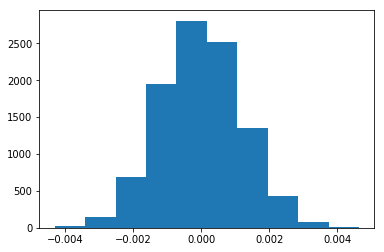

In [35]:
# We computed the differences of probabilities of simulated mean values under null. 
# Here we are plotting the differences of the probabilities
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
new_page_converted_prob = df2[df2.group == 'treatment'].converted.mean()
old_page_converted_prob = df2[df2.group == 'control'].converted.mean()
actual_diff_prob = new_page_converted_prob - old_page_converted_prob
print("actual difference observered in the data is : ",actual_diff_prob)

actual difference observered in the data is :  -0.00157823898536


In [37]:
# Standard deviation of different of probabilities
std_dev = p_diffs.std()

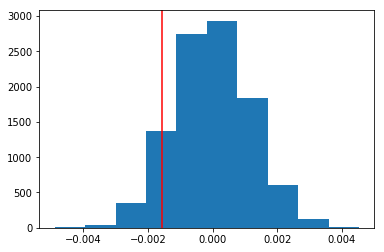

In [38]:
# Simulating draws from normal using the hypothesized value of 0 and the standard deviation of the sampling distribution 
# Each of the simulated draws here represents possible mean from the Null hypothesis.
# We are checking where the sample mean which is a 'actual_diff' (that we calculated in the previous cell)
# falls in this distribution 

nullvals = np.random.normal(0, std_dev, 10000)
plt.hist(nullvals);
plt.axvline(actual_diff_prob, color = 'red');

In [39]:
(nullvals > actual_diff_prob).mean()

0.90690000000000004

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### In part j, we first computed the actual difference of probabilities of conversion with the new page and the old page. We calculated p value, a smaller p-value means that there is stronger evidence in favor of the alternative hypothesis i.e. p value > 0.05 is the probability that the null hypothesis is true. A p value greater than 0.05 means that no effect was observed with new page roll out. Based on the value calculated (.90) we can say, there is not much difference between conversions even after rolling out a new page during A/B testing.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()

convert_old_len = len(df2[df2.group == 'control'].index)
convert_new_len = len(df2[df2.group == 'treatment'].index)
print(convert_old)
print(convert_new)
print(convert_old_len)
print(convert_new_len)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [convert_old_len, convert_new_len], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## The z score and p value are same as previous j and k steps. Hence, we fail to reject the null hypothesis which means that new page doesn't result is additional conversion (not better than the old page)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## We will use **binary classification** and to do that we will use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
# Creating a new column as per the instructions with value 1 for each row in the df2 dataframe
df2['intercept'] = 1

In [43]:
# Column group is a categorical column, as per the instructions above, we are creating dummy variables which will create 
# additional columns (one for each categorical value) with value 1 or 0 depending on the value of the column "group"
# While create dummy columns for group, it will create two additional columns with headings 'control' and 'treatment'
# however because the instruction have asked to rename the column treatment ----> to ab_page, we are specifying the column
# names as 'control' and 'ab_page'
df2[['control','ab_page']] = pd.get_dummies(df2['group'])

# dropping control column to avoid dummy trap variable issue with regression model.
df2.drop(['control'], axis=1, inplace=True)
df2.drop(['group'], axis=1, inplace=True)

df2.head(3)

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
# instantiate regression model
regression_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

#train the model
results = regression_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-19 03:56 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### Based on the Logistic regression model, we see that the p value of ab_page is 0.1899 which is larger than 0.005 hence we can say that null hypothesis cannot be rejected i.e. new page does not increase the rate of converstion viz-a-viz old page.

#### In part II the p value was different as we performed the one-tail test, however the regression model in part III uses the two-tail test which means in a normal distribution bell curve, both extreme will be considered.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Other factors may influence the conversion, we should consider other factors too. However, we cannot calculate the model with all the premutation and combination of multiple factors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
countries_df.nunique()

user_id    290584
country         3
dtype: int64

In [48]:
df_county_2 = countries_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')

In [49]:
df_county_2.head()

,country,timestamp,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1


In [50]:
### Create the necessary dummy variables
df_county_2[['ca','uk','us']] = pd.get_dummies(df_county_2['country'])
df_county_2.drop(['country'], axis=1, inplace=True)
df_county_2.drop(['ca'], axis=1, inplace=True)
df_county_2.head()

,timestamp,landing_page,converted,intercept,ab_page,uk,us
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
logit_mod = sm.Logit(df_county_2['converted'], df_county_2[['intercept','ab_page','us','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [52]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-19 03:57 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
us             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
uk             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [53]:
df_county_2['interaction_us'] = df_county_2['us'] * df_county_2['ab_page']
df_county_2['interaction_uk'] = df_county_2['uk'] * df_county_2['ab_page']

In [55]:
logit_mod = sm.Logit(df_county_2['converted'], df_county_2[['intercept', 'ab_page', 'us', 'uk', 'interaction_us', 'interaction_uk']])

In [58]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [59]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-19 03:58 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -2.0040   0.0364 -55.0077 0.0000 -2.0754 -1.9326
ab_page           -0.0674   0.0520  -1.2967 0.1947 -0.1694  0.0345
us                 0.0175   0.0377   0.4652 0.6418 -0.0563  0.0914
uk                 0.0118   0.0398   0.2957 0.7674 -0.0663  0.0899
interaction_us     0.0469   0.0538   0.8718 0.3833 -0.0585  0.1523
interaction_uk     0.0783   0.0568   1.3783 0.1681 -0.0330  0.1896
==================================================================

"""

**CONCULSION** 

By adding country column in the dataset we observed that it has an no impact on the p value. Without having the country column in the dataset, p value using regression model was **0.1899**, however with country the p value increased to **0.1912**.

The performance of the old page is better than new page.So, we are failed to reject the Null hypothesis. There is no point rolling out new page as that will not result into increase in conversion based on the results that we have seen through different methods.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0